# Land Usage in Chinatown
## By Brian Kohaya
### Description: How land usage has changed in Chinatown 

In [1]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [4]:
address = 'Chinatown, Los Angeles, CA'

In [5]:
osm = ox.geometries_from_address(address,tags={'building':True},dist=1000)

In [6]:
osm.shape

(1343, 90)

In [7]:
type(osm)

geopandas.geodataframe.GeoDataFrame

In [8]:
osm.sample(10)

historic name tourism  \
element_type osmid                             
way          428812859      NaN  NaN     NaN   
             429320367      NaN  NaN     NaN   
             425668995      NaN  NaN     NaN   
             429320517      NaN  NaN     NaN   
relation     6378646        NaN  NaN     NaN   
way          429196754      NaN  NaN     NaN   
             425670734      NaN  NaN     NaN   
             425670736      NaN  NaN     NaN   
             428849480      NaN  NaN     NaN   
             428813017      NaN  NaN     NaN   

                                                                 geometry  \
element_type osmid                                                          
way          428812859  POLYGON ((-118.24306 34.06240, -118.24308 34.0...   
             429320367  POLYGON ((-118.24361 34.06367, -118.24380 34.0...   
             425668995  POLYGON ((-118.24622 34.06638, -118.24625 34.0...   
             429320517  POLYGON ((-118.23817 34.06622, -118.23830 34.0...   
relation     6378646    POLYGON ((-118.23507 34.05692, -118.23507 34.0...   
way          429196754  POLYGON ((-118.23595 34.06546, -118.23604 34.0...   
             425670734  POLYGON ((-118.24081 34.06754, -118.24077 34.0...   
             425670736  POLYGON ((-118.24588 34.06817, -118.24578 34.0...   
             428849480  POLYGON ((-118.22833 34.06157, -118.22829 34.0...   
             428813017  POLYGON ((-118.24415 34.06317, -118.24414 34.0...   

                        amenity       parking access highway  \
element_type osmid                                             
way          428812859      NaN           NaN    NaN     NaN   
             429320367      NaN           NaN    NaN     NaN   
             425668995      NaN           NaN    NaN     NaN   
             429320517      NaN           NaN    NaN     NaN   
relation     6378646        NaN           NaN    NaN     NaN   
way          429196754      NaN           NaN    NaN     NaN   
             425670734      NaN           NaN    NaN     NaN   
             425670736      NaN           NaN    NaN     NaN   
             428849480  parking  multi-storey    NaN     NaN   
             428813017      NaN           NaN    NaN     NaN   

                                                                    nodes  \
element_type osmid                                                          
way          428812859  [4279162226, 4279162227, 4279162234, 427916223...   
             429320367  [4284384083, 4284384161, 4284384236, 428438421...   
             425668995  [4249620193, 4249621132, 4249621138, 424962113...   
             429320517  [4284386071, 4284386088, 4284386216, 428438620...   
relation     6378646    [[[4279674560, 4279674562, 4279674563, 4279674...   
way          429196754  [4283250187, 4283250161, 4283250167, 428325040...   
             425670734  [4249639498, 4249639456, 4249639541, 424963918...   
             425670736  [4249640345, 4249640303, 4249640132, 424964016...   
             428849480  [4279676229, 8256402388, 4279676213, 427967619...   
             428813017  [4279163098, 4279162978, 4279162976, 427916296...   

                       addr:city  ... leisure area  \
element_type osmid                ...                
way          428812859       NaN  ...     NaN  NaN   
             429320367       NaN  ...     NaN  NaN   
             425668995       NaN  ...     NaN  NaN   
             429320517       NaN  ...     NaN  NaN   
relation     6378646         NaN  ...     NaN  NaN   
way          429196754       NaN  ...     NaN  NaN   
             425670734       NaN  ...     NaN  NaN   
             425670736       NaN  ...     NaN  NaN   
             428849480       NaN  ...     NaN  NaN   
             428813017       NaN  ...     NaN  NaN   

                       building:levels:underground museum opening_hours shade  \
element_type osmid                                                              
way          428

In [9]:
osm.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 1343 entries, ('way', 30613740) to ('relation', 12292681)
Data columns (total 90 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   historic                      20 non-null     object  
 1   name                          86 non-null     object  
 2   tourism                       5 non-null      object  
 3   geometry                      1343 non-null   geometry
 4   amenity                       35 non-null     object  
 5   parking                       11 non-null     object  
 6   access                        2 non-null      object  
 7   highway                       1 non-null      object  
 8   nodes                         1343 non-null   object  
 9   addr:city                     37 non-null     object  
 10  addr:housenumber              40 non-null     object  
 11  addr:postcode                 68 non-null     object  
 12  addr:s

In [10]:
columns_to_keep = ['geometry','building','height']
osm = osm[columns_to_keep]
osm.head(10)

geometry  \
element_type osmid                                                         
way          30613740  POLYGON ((-118.23325 34.05659, -118.23324 34.0...   
             30666790  POLYGON ((-118.23605 34.05856, -118.23604 34.0...   
             33526814  POLYGON ((-118.23559 34.05543, -118.23559 34.0...   
             33527307  POLYGON ((-118.23726 34.05491, -118.23756 34.0...   
             39550465  POLYGON ((-118.24485 34.05804, -118.24484 34.0...   
             48617143  POLYGON ((-118.23626 34.06261, -118.23625 34.0...   
             48617144  POLYGON ((-118.23730 34.06208, -118.23721 34.0...   
             48617150  POLYGON ((-118.23643 34.06178, -118.23637 34.0...   
             48617151  POLYGON ((-118.23637 34.06207, -118.23634 34.0...   
             48617152  POLYGON ((-118.23634 34.06227, -118.23626 34.0...   

                         building height  
element_type osmid                        
way          30613740      office   15.8  
             30666790  commercial   39.2  
             33526814         yes   57.3  
             33527307         yes   13.7  
             39550465   cathedral   15.0  
             48617143  commercial    4.2  
             48617144  commercial    5.7  
             48617150  apartments   40.1  
             48617151  apartments   40.1  
             48617152  apartments   40.1

In [11]:
osm.loc[osm['building']=='yes','building'] = 'unspecified'

In [12]:
osm_building_counts = osm.value_counts(['building']).reset_index(name="count")
osm_building_counts

building  count
0      unspecified    306
1       apartments    280
2            house    203
3      residential    178
4           retail    150
5       commercial     83
6       industrial     51
7        warehouse     29
8             roof     19
9           school      9
10         parking      8
11         factory      6
12           hotel      5
13           kiosk      5
14        hospital      4
15          office      2
16       cathedral      1
17      guardhouse      1
18   train_station      1
19  transportation      1
20         library      1

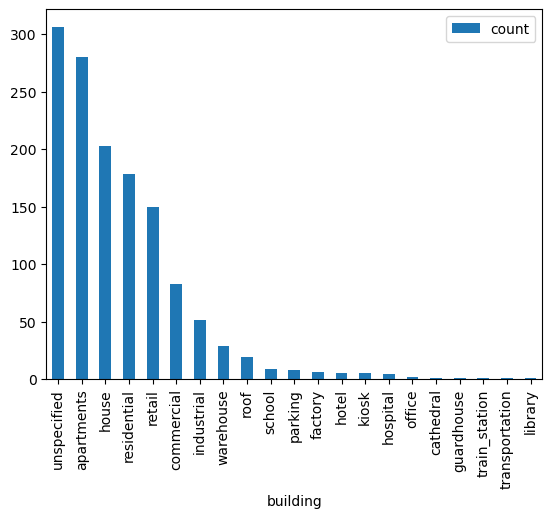

In [13]:
osm_building_counts.plot.bar(x='building');

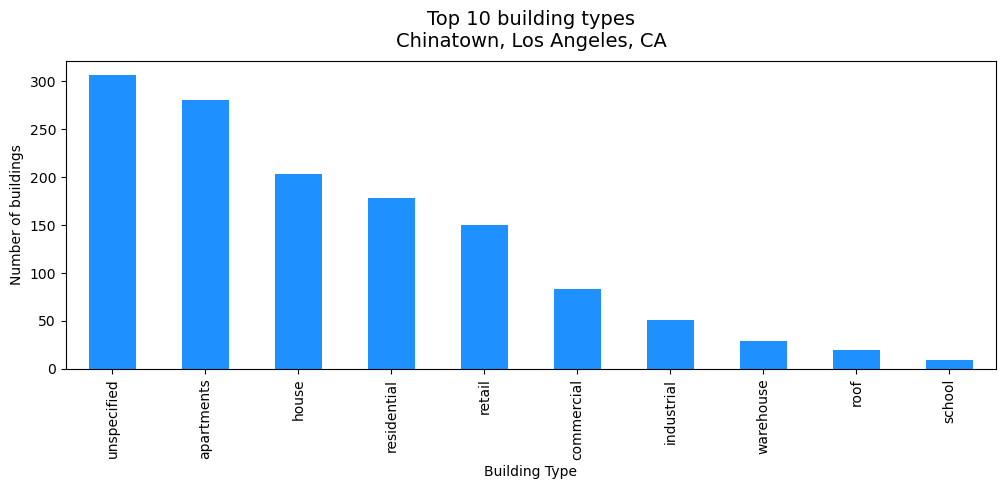

In [14]:
fig, ax = plt.subplots(figsize=(12,4))

osm_building_counts[:10].plot.bar(ax=ax,
                                      x='building',
                                      y='count',
                                      legend=False,
                                      color='dodgerblue'
                                      )
ax.set_xlabel('Building Type') # override x label
ax.set_ylabel('Number of buildings') # override y label
ax.set_title("Top 10 building types\n"+address,fontsize=14,pad=10); # multi-line title with paddin

In [15]:
# import the themes
import plotly.io as pio
pio.templates.default = "plotly_white"

/opt/conda/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



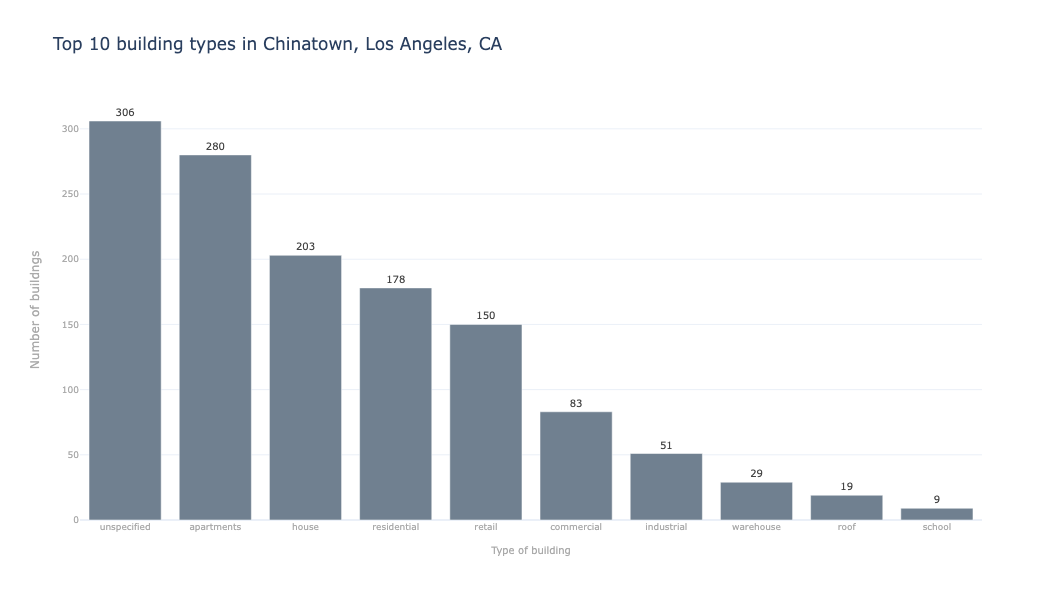

In [16]:
# bar chart
fig = px.bar(osm_building_counts.head(10),
        x='building',
        y='count',
        title="Top 10 building types in "+address, # title
        text_auto = True,
        height=600,
        width=900,
        color_discrete_sequence =['slategray']*len(osm_building_counts), # single color for all the bars
        labels={
                'count': 'Number of buildngs',
                'building': 'Type of building',
        })

# bar label
fig.update_traces(textposition='outside',textfont_size=10,textfont_color='#444')

# axes labels
fig.update_yaxes(title_font_size=12,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)
fig.update_xaxes(title_font_size=10,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)

# show the figure
fig.show()

<AxesSubplot: >

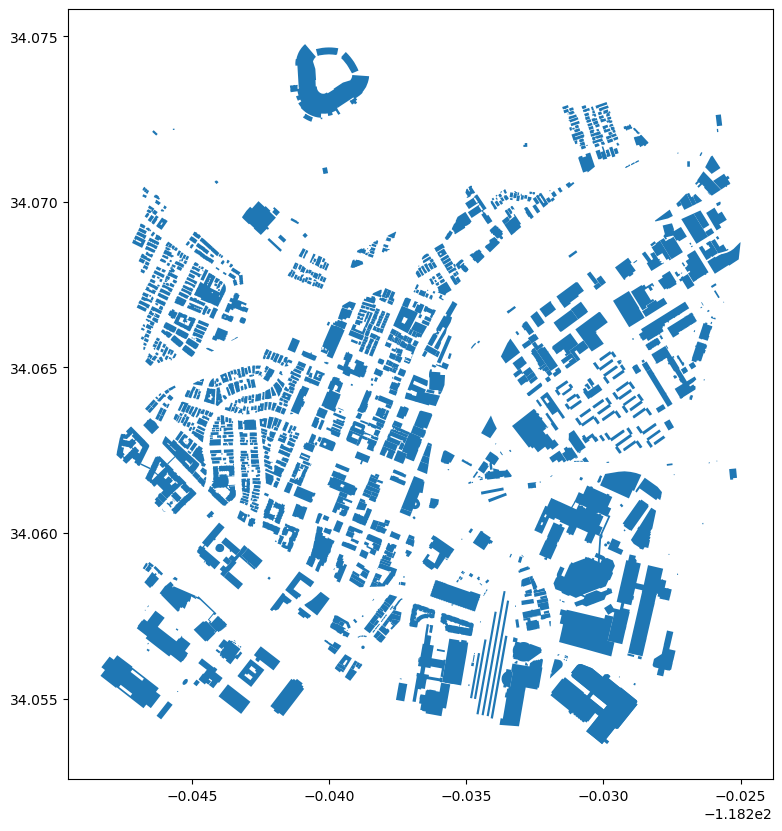

In [17]:
osm.plot(figsize=(10,10))

<AxesSubplot: >

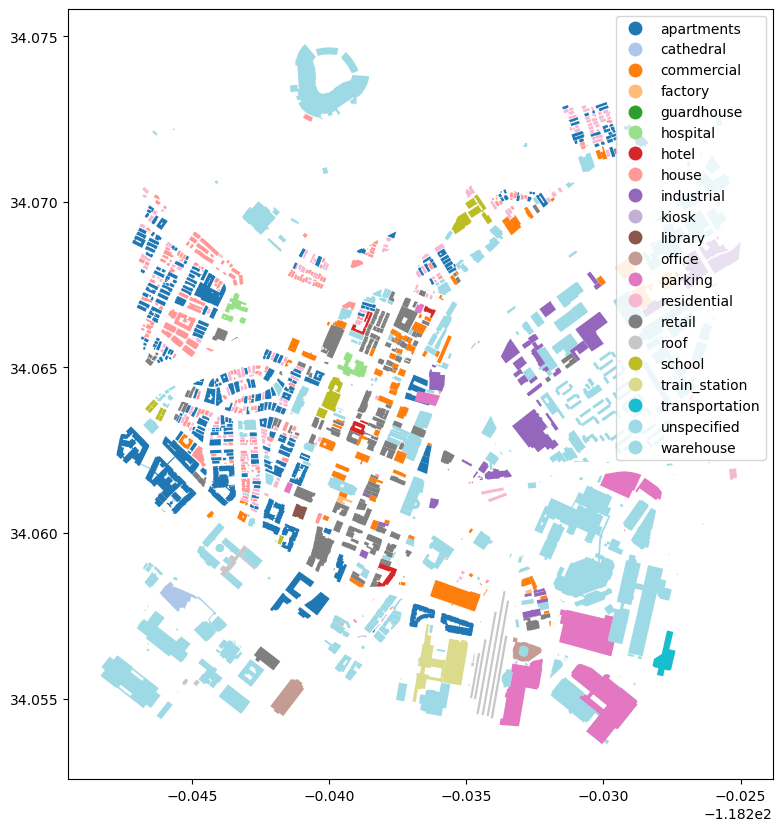

In [18]:
osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

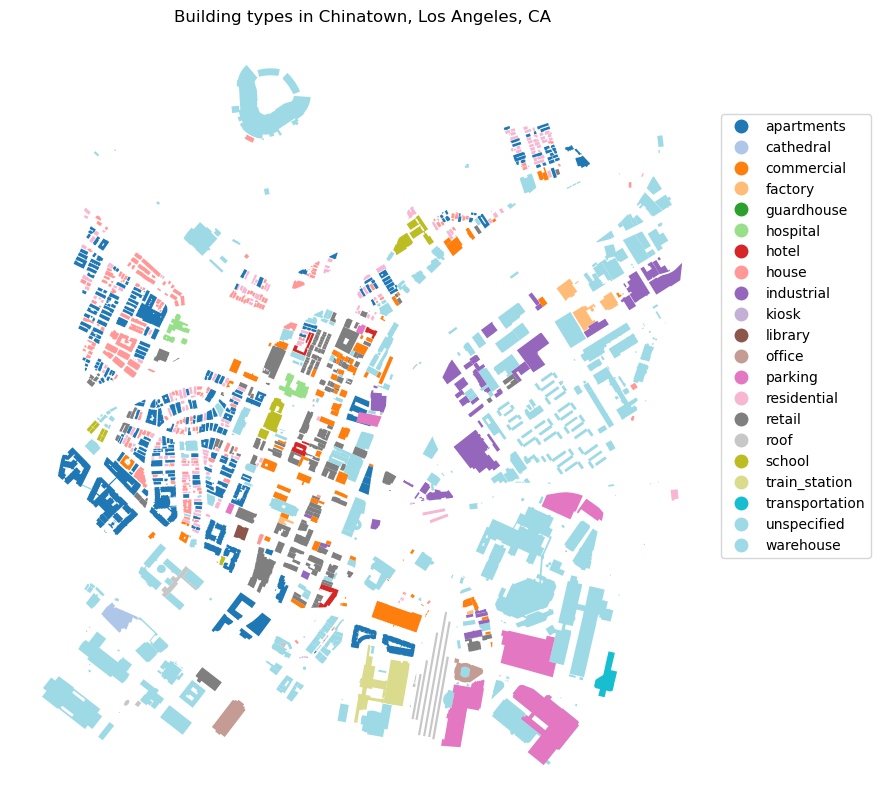

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
osm.plot(ax=ax,
         column='building',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)})

# add a title
ax.set_title('Building types in ' + address)

# get rid of the axis
ax.axis('off');

In [20]:
# get min/max bounds of lat/lon
minx = osm.total_bounds[0]
miny = osm.total_bounds[1]
maxx = osm.total_bounds[2]
maxy = osm.total_bounds[3]

In [21]:
buildingtypes = osm['building'].unique().tolist()
buildingtypes

['office',
 'commercial',
 'unspecified',
 'cathedral',
 'apartments',
 'roof',
 'retail',
 'industrial',
 'warehouse',
 'residential',
 'factory',
 'transportation',
 'house',
 'hospital',
 'guardhouse',
 'school',
 'parking',
 'hotel',
 'library',
 'kiosk',
 'train_station']

/tmp/ipykernel_57/2875760281.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



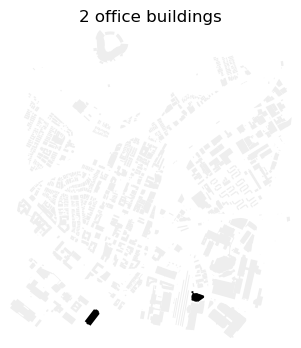

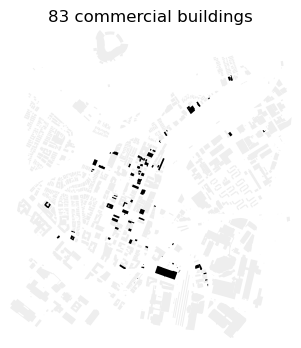

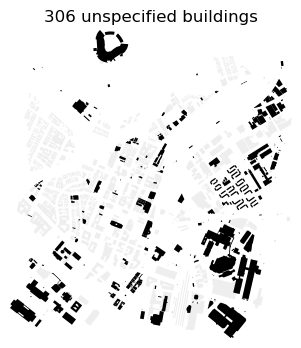

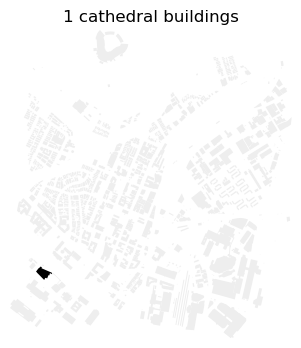

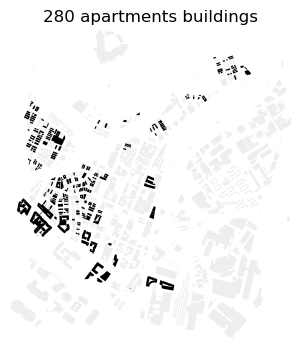

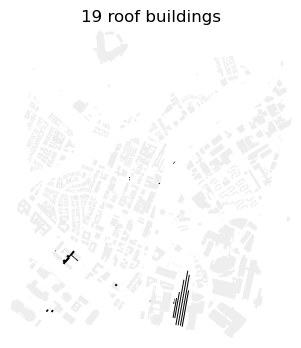

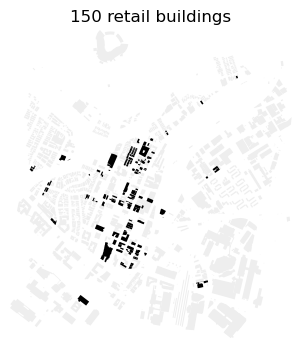

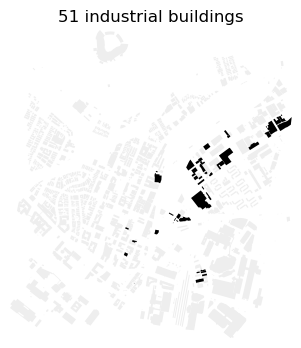

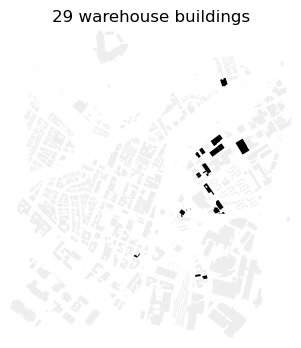

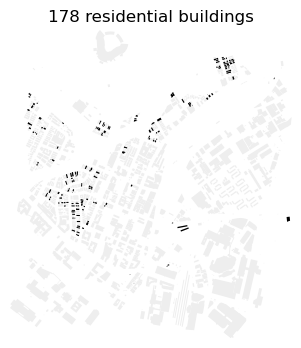

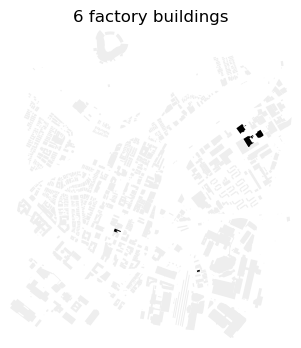

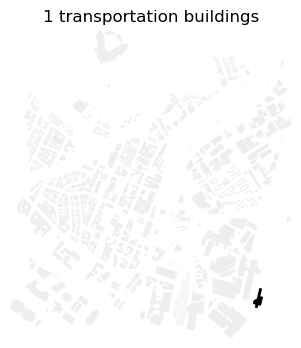

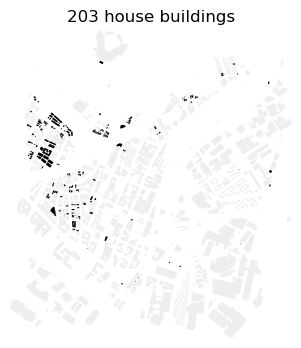

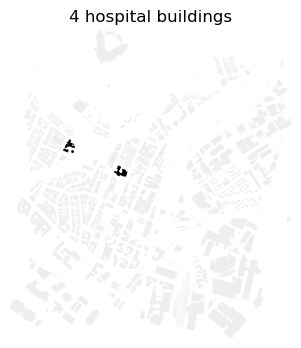

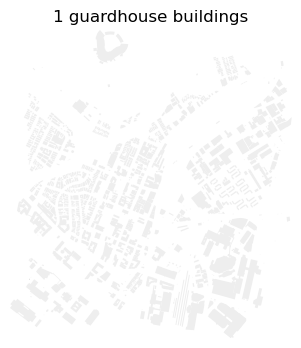

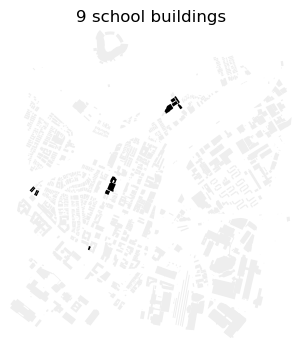

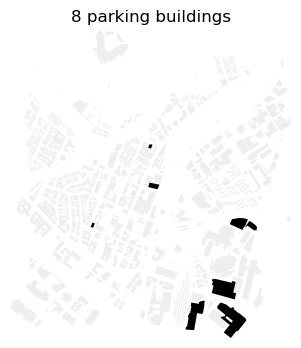

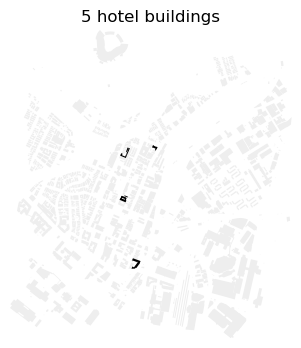

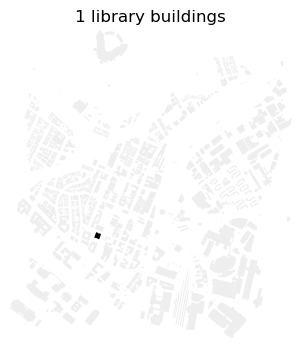

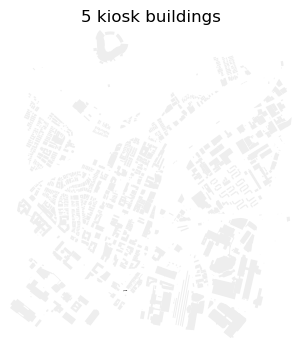

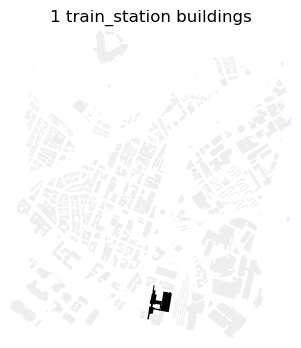

In [22]:
# loop through building types
for type in buildingtypes:
    fig, ax = plt.subplots(figsize=(4,4))

    # create the map plot
    osm.plot(ax=ax,
            # column='building',
            color='#eee')

    # create the map plot
    osm[osm['building'] == type].plot(ax=ax,
            # column='building',
            color='black')

    # set the extent of the map 
    # so that each map has the same bounds
    ax.set_xlim((minx,maxx))
    ax.set_ylim((miny,maxy))

    # add a title
    number_of_buildings = len(osm[osm['building']==type])
    ax.set_title(str(number_of_buildings) + ' ' + type + ' buildings')

    # get rid of the axis
    ax.axis('off');

In [23]:
# reproject to Web Mercator
osm_web_mercator = osm.to_crs(epsg=3857)

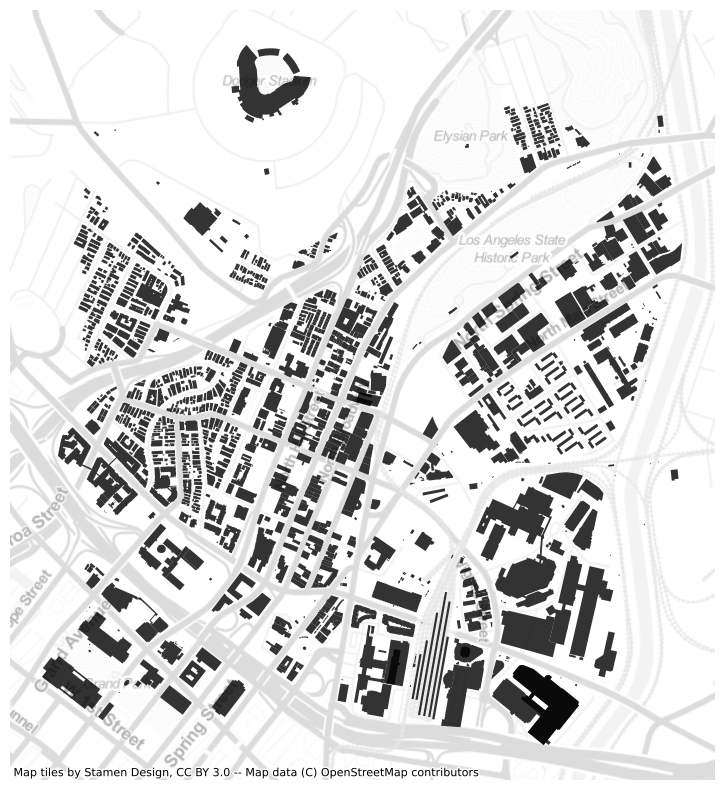

In [24]:
fig,ax = plt.subplots(figsize=(10,10))

osm_web_mercator.plot(ax=ax,
                    color="black",
                    alpha=0.8,
                    )

# get rid of the axis
ax.axis('off');

# basemap from carto that has a dark background (easier to see)
ctx.add_basemap(ax=ax,
                source=ctx.providers.Stamen.TonerLite,
                alpha=0.3 # add transparency to make it less dominant
                )